William Thompson

# Decision Trees, Regression

## Part 1: Decision Tree for Accute Inflammation

Attribute Information:

a1 Temperature of patient { 35C-42C }

a2 Occurrence of nausea { yes, no }

a3 Lumbar pain { yes, no }

a4 Urine pushing (continuous need for urination) { yes, no }

a5 Micturition pains { yes, no }

a6 Burning of urethra, itch, swelling of urethra outlet { yes, no }

d1 decision: Inflammation of urinary bladder { yes, no }

d2 decision: Nephritis of renal pelvis origin { yes, no }

Goal: Diagnose one of the two decisions (diseases).

### Import and Prepare Data

In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 10)

headers=['A1','A2','A3','A4','A5','A6','D1','D2']
data = pd.read_csv('lab5data/diagnosis.csv', header = None, encoding='utf-16', sep='\t', names=headers, decimal=',')

data[data.columns[1:8]] = data[data.columns[1:8]].eq('yes').mul(1)

data

,A1,A2,A3,A4,A5,A6,D1,D2
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
115,41.4,0,1,1,0,1,0,1
116,41.5,0,0,0,0,0,0,0
117,41.5,1,1,0,1,0,0,1
118,41.5,0,1,1,0,1,0,1


### Decision Tree on Whole Data Set

[Text(133.92000000000002, 195.696, 'X[0] <= 37.95\ngini = 0.493\nsamples = 120\nvalue = [[61, 59]\n[70, 50]]'),
 Text(66.96000000000001, 152.208, 'X[2] <= 0.5\ngini = 0.222\nsamples = 60\nvalue = [[20, 40]\n[60, 0]]'),
 Text(33.480000000000004, 108.72, 'gini = 0.0\nsamples = 40\nvalue = [[0, 40]\n[40, 0]]'),
 Text(100.44000000000001, 108.72, 'gini = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(200.88000000000002, 152.208, 'X[2] <= 0.5\ngini = 0.355\nsamples = 60\nvalue = [[41, 19]\n[10, 50]]'),
 Text(167.40000000000003, 108.72, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(234.36, 108.72, 'X[4] <= 0.5\ngini = 0.236\nsamples = 50\nvalue = [[31, 19]\n[0, 50]]'),
 Text(200.88000000000002, 65.232, 'gini = 0.0\nsamples = 21\nvalue = [[21, 0]\n[0, 21]]'),
 Text(267.84000000000003, 65.232, 'X[3] <= 0.5\ngini = 0.226\nsamples = 29\nvalue = [[10, 19]\n[0, 29]]'),
 Text(234.36, 21.744, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[0, 10]]'),
 Text(301.32000000000005, 2

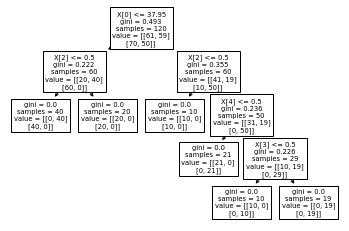

In [2]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
X = data[['A1','A2','A3','A4','A5','A6']]
y = data[['D1','D2']]
clf = clf.fit(X, y)
tree.plot_tree(clf)

In [3]:
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):

    '''
    Outputs a decision tree model as a Python function
    
    Parameters:
    -----------
    tree: decision tree model
        The decision tree to represent as a function
    feature_names: list
        The feature names of the dataset used for building the decision tree
    '''

    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)
    
tree_to_code(clf, list(['A1','A2','A3','A4','A5','A6']))

def tree(A1, A2, A3, A4, A5, A6):
  if A1 <= 37.95000076293945:
    if A3 <= 0.5:
      return [[ 0. 40.]
 [40.  0.]]
    else:  # if A3 > 0.5
      return [[20.  0.]
 [20.  0.]]
  else:  # if A1 > 37.95000076293945
    if A3 <= 0.5:
      return [[10.  0.]
 [10.  0.]]
    else:  # if A3 > 0.5
      if A5 <= 0.5:
        return [[21.  0.]
 [ 0. 21.]]
      else:  # if A5 > 0.5
        if A4 <= 0.5:
          return [[10.  0.]
 [ 0. 10.]]
        else:  # if A4 > 0.5
          return [[ 0. 19.]
 [ 0. 19.]]


## Part 2: Communities and Crime Data

### Import, Prepare, Explore Data

First 1495 rows of data are the training set and the rest is the test set.

In [4]:
from sklearn.impute import SimpleImputer

df = pd.read_csv("lab5data/communities.csv", header=None)

# all_Train = df.iloc[0:1495, 5:]
# all_Test = df.iloc[1496:, 5:]

X_Train = df.iloc[0:1495, 5:127]
Y_Train = df.iloc[0:1495, 127:]

X_Test = df.iloc[1495:, 5:127]
Y_Test = df.iloc[1495:, 127:]

pd.set_option('display.max_rows', 10)

The data set has missing values, so we will use a simple data imputation technique (mean) to deal with the missing values in the data set. The data description mentions that five features are nonpredictive (Columns 0,1,2,3,4), so we will ignore those features.

In [5]:
X_Train = X_Train.apply(pd.to_numeric, errors='coerce')
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X_Train)

X_Train_Imputed = imp_mean.transform(X_Train)
X_Train_Imputed = pd.DataFrame(X_Train_Imputed)

X_Test = X_Test.apply(pd.to_numeric, errors='coerce')
X_Test_Imputed = imp_mean.transform(X_Test)
X_Test_Imputed = pd.DataFrame(X_Test_Imputed)


In [6]:
X_Train_Imputed

,0,1,2,3,4,5,6,7,8,9,...,112,113,114,115,116,117,118,119,120,121
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.290000,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.323598,0.02,0.12,0.45,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.323598,0.01,0.21,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.323598,0.02,0.39,0.28,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.323598,0.04,0.09,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,0.00,0.59,0.01,0.69,1.00,0.07,0.41,0.28,0.23,0.57,...,0.323598,0.02,0.14,0.22,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
1491,0.16,0.62,0.03,0.74,0.48,0.42,0.44,0.57,0.40,0.25,...,0.380000,0.07,0.40,0.14,0.070000,0.050000,0.850000,0.500000,0.61,0.190000
1492,0.01,0.36,0.95,0.24,0.03,0.01,0.44,0.42,0.27,0.63,...,0.323598,0.03,0.12,0.01,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
1493,0.06,0.53,0.01,0.98,0.05,0.01,0.40,0.40,0.24,0.29,...,0.323598,0.08,0.15,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753


##### Correlation Matrix

In [7]:
predictive_df = df.iloc[:, 5:128]
predictive_df.corr()

,5,6,7,8,9,10,11,12,13,14,...,96,97,98,99,100,118,119,120,125,127
5,1.000000,-0.046148,0.231178,-0.300845,0.181603,0.156218,0.006368,0.130344,0.075596,-0.102006,...,0.172731,-0.125133,-0.123691,0.001610,-0.089638,0.713652,0.231897,0.270356,0.466352,0.367157
6,-0.046148,1.000000,-0.067109,-0.235907,0.201996,0.468659,0.520461,0.367338,0.295225,-0.612666,...,0.311107,-0.049253,-0.057842,-0.103109,-0.003277,-0.015078,-0.004072,-0.051506,-0.094368,-0.034923
7,0.231178,-0.067109,1.000000,-0.794389,-0.106738,-0.066581,0.122338,0.153475,0.134068,0.052934,...,-0.098114,0.093494,-0.045646,0.056358,-0.002894,0.149758,0.095053,0.147023,0.260793,0.631264
8,-0.300845,-0.235907,-0.794389,1.000000,-0.270266,-0.444166,-0.194015,-0.266852,-0.183804,0.136483,...,-0.372924,0.113798,0.165285,-0.019677,0.032415,-0.131389,-0.337458,-0.215636,-0.276234,-0.684770
9,0.181603,0.201996,-0.106738,-0.270266,1.000000,0.266743,-0.025020,0.100727,0.052761,-0.272020,...,0.657451,-0.405276,-0.189517,-0.194923,-0.198279,-0.001084,0.389944,0.296921,0.101888,0.037622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,0.713652,-0.015078,0.149758,-0.131389,-0.001084,0.011634,0.025736,0.062476,0.031632,-0.124245,...,-0.048845,-0.069273,-0.116901,-0.062989,-0.104403,1.000000,-0.170856,0.007699,0.299632,0.196800
119,0.231897,-0.004072,0.095053,-0.337458,0.389944,0.370103,-0.095749,0.119725,0.045979,0.015434,...,0.614772,-0.221341,0.020701,0.118082,-0.012166,-0.170856,1.000000,0.587804,0.228084,0.281390
120,0.270356,-0.051506,0.147023,-0.215636,0.296921,0.078366,-0.173279,-0.023507,-0.040419,0.006786,...,0.401711,-0.175459,0.192367,0.081260,-0.042424,0.007699,0.587804,1.000000,0.206644,0.153829
125,0.466352,-0.094368,0.260793,-0.276234,0.101888,0.125353,0.001301,0.117290,0.083180,-0.010168,...,0.170946,-0.134230,-0.090249,0.008227,-0.107289,0.299632,0.228084,0.206644,1.000000,0.348627


Coefficient of Variation CV for each feature, where CV = s/m, in which s is sample standard deviation and m is sample mean.

In [8]:
# I_Data_1 = pd.DataFrame(X_Train_Imputed)
# I_Data_1.insert(122,122,Y_Train)

# I_Data_2 = pd.DataFrame(X_Test_Imputed)
# Y_Test = Y_Test.set_index(I_Data_2.index)
# I_Data_2.insert(122,122,Y_Test)

# Imputed_df = pd.concat([I_Data_1,I_Data_2])

# pd.set_option('display.max_rows', 10)


# Imputed_df[[0]].mean()
# Imputed_df[[0]].std()

CVs = []
for column in X_Train_Imputed:
    CVs.append((X_Train_Imputed[column].std())/(X_Train_Imputed[column].mean()))
    
    
CVs

[2.2411046245803745,
 0.3557995664028941,
 1.4288854186502822,
 0.3302126634442826,
 1.359099684159002,
 1.612091005228411,
 0.3690831192095117,
 0.2913148106352062,
 0.5003099115377213,
 0.4127759758512281,
 2.0384614919156445,
 0.6433181716461008,
 0.5919781653450651,
 0.3286140569015946,
 0.701897873082006,
 0.365334582744191,
 0.36071544651696696,
 0.7062058943769388,
 0.3454209567630026,
 0.5406701530549352,
 0.5580794526579645,
 0.519828467024789,
 0.5993405451897994,
 0.8183681264327733,
 0.6148655265869314,
 0.6732216220634875,
 0.4840679504501606,
 2.3424431162181505,
 0.754469978085357,
 0.6804903296377428,
 0.5337533808931807,
 0.5926798349812531,
 0.562424698851533,
 0.3514504046780556,
 0.5135297542547989,
 0.40284884867313686,
 0.5163793587769291,
 0.43266953598425273,
 0.3993660859242948,
 0.40406152224265024,
 0.3603898277589537,
 0.37390450168497985,
 0.31737540470857095,
 0.3331946554395547,
 0.33487556916187433,
 0.3338334680337065,
 0.3278008334193768,
 0.3406809390

Select √122 features with highest CV, and make scatter plots and box plots for them.

In [9]:
pd.set_option('display.max_rows', 10)
CVs = pd.DataFrame(CVs)
CVs.sort_values(by=[0])

,0
98,0.064288
118,0.115739
105,0.122813
104,0.134853
111,0.144382
...,...
120,2.552946
51,2.926635
49,3.058964
89,3.470952


In [10]:
#Plots for features 98,118,105,104,111,102,72,99,60,7,95

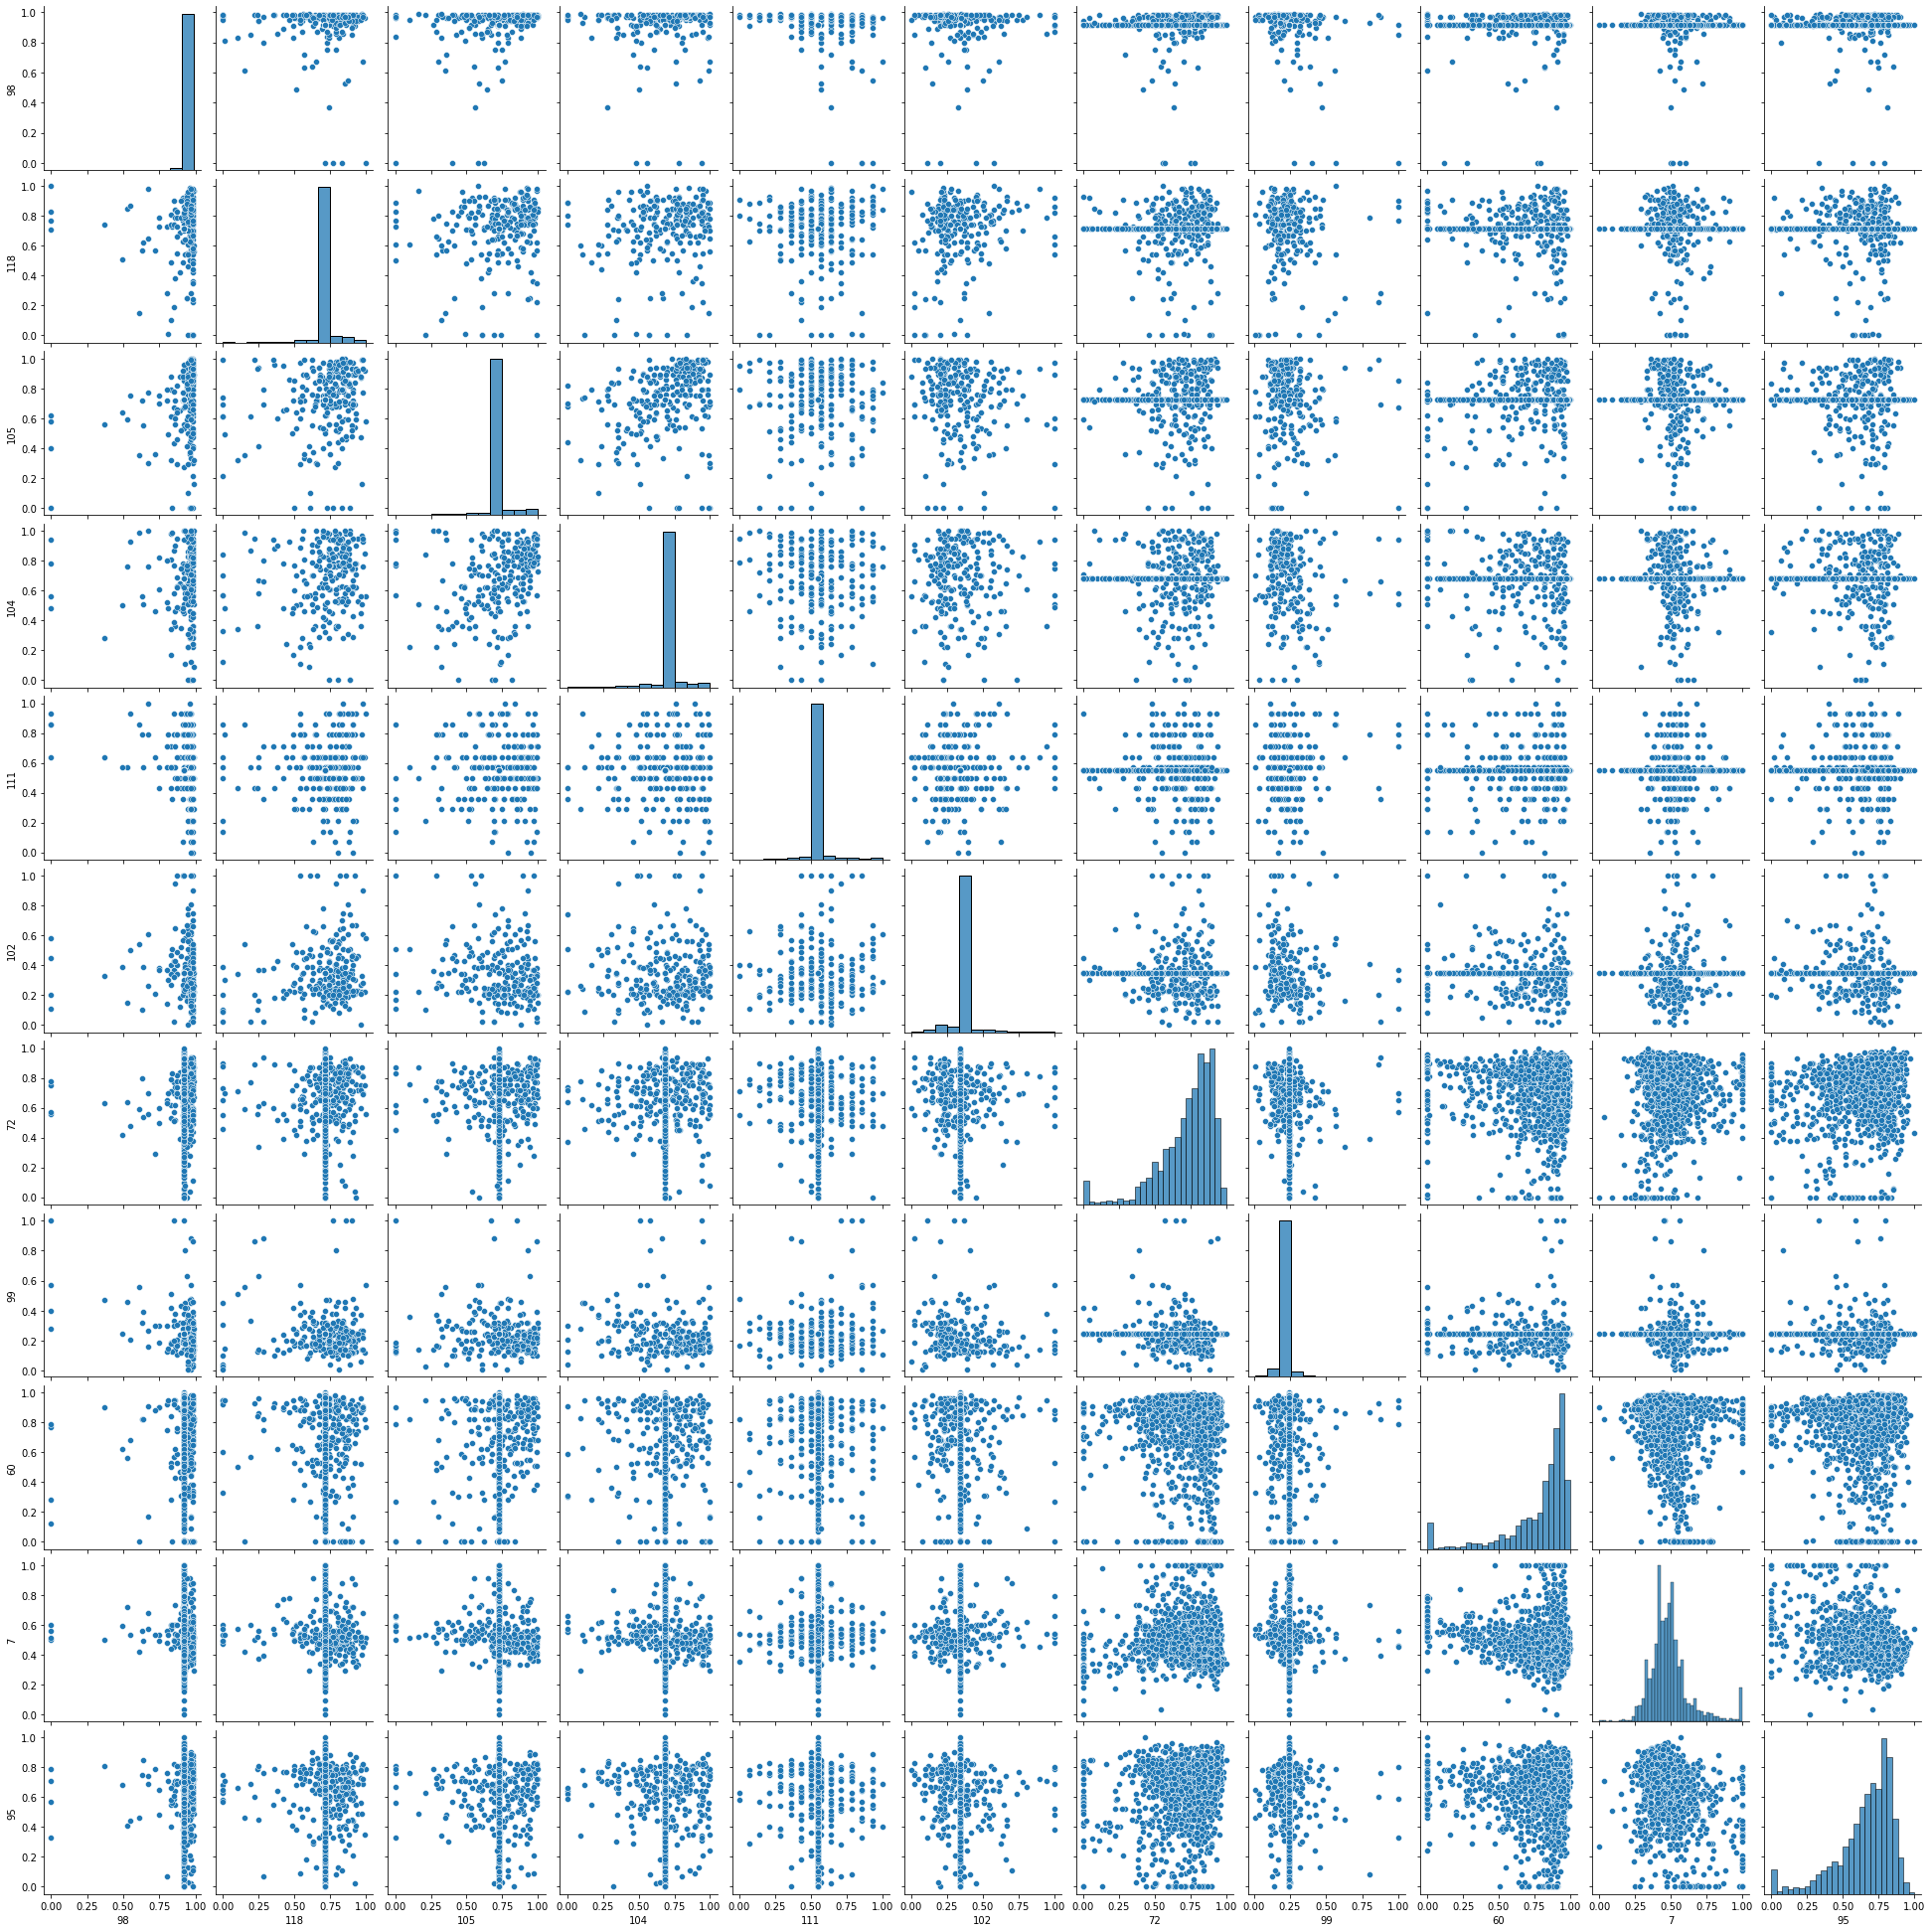

In [11]:
#Scatterplots
import seaborn as sns
plots_df = X_Train_Imputed[[98,118,105,104,111,102,72,99,60,7,95]]
sns.pairplot(plots_df)

<AxesSubplot:>

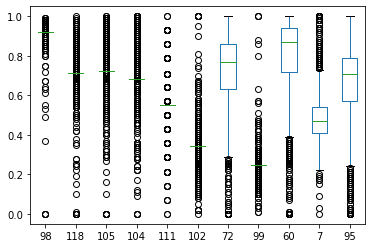

In [12]:
plots_df.plot(kind='box')

### Linear Regression Model

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error

# multi_train_X = X_Train_Imputed
# multi_test_X = X_Test_Imputed

reg = LinearRegression().fit(X_Train_Imputed, Y_Train)
predictions = reg.predict(X_Test_Imputed)


reg.get_params()



# mse = mean_squared_error(Y_Test, predictions)

# predictions = pd.DataFrame(predictions)

# mse




{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

##### Ridge regression model, with λ chosen by 5-fold cross-validation on training set.(L2)

In [14]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV


ridge = linear_model.RidgeCV(cv=5)
ridge.fit(X_Train_Imputed, Y_Train)

# best_alpha_l2 = reg.alpha_

predictions_l2 = ridge.predict(X_Test_Imputed)
print(mean_squared_error(Y_Test, predictions_l2))


0.01773247499289664


##### LASSO model, with λ chosen by 5-fold cross-validation on the training set. Repeat with standardized features.

In [15]:
lasso = linear_model.LassoCV(cv=5)
lasso.fit(X_Train_Imputed, Y_Train)



coeffs = pd.DataFrame(lasso.coef_)

# best_alpha_l1 = lasso.alpha_

coeffs

/Users/willthompson/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/willthompson/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00975293022821333, tolerance: 0.006746416078595318
  model = cd_fast.enet_coordinate_descent_gram(
/Users/willthompson/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01011361015590495, tolerance: 0.006746416078595318
  model = cd_fast.enet_coordinate_descent_gram(


,0
0,-0.000000
1,0.000000
2,0.271984
3,-0.000000
4,-0.015671
...,...
117,-0.000000
118,0.021212
119,0.040028
120,0.002132


In [16]:
predictions_l1 = lasso.predict(X_Test_Imputed)
print("Error: \n", mean_squared_error(Y_Test, predictions_l1))

Error: 
 0.017758209216319674


In [17]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_Train_Imputed)
X_Train_scaled = scaler.transform(X_Train_Imputed)
X_Test_scaled = scaler.transform(X_Test_Imputed)

lasso2 = linear_model.LassoCV(cv=5)
lasso2.fit(X_Train_scaled, Y_Train)

coeffs_scaled = pd.DataFrame(lasso2.coef_)

# best_alpha_l1 = lasso.alpha_

coeffs_scaled

/Users/willthompson/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/willthompson/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009826702368904705, tolerance: 0.006746416078595318
  model = cd_fast.enet_coordinate_descent_gram(
/Users/willthompson/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010211306993532787, tolerance: 0.006746416078595318
  model = cd_fast.enet_coordinate_descent_gram(
/Users/willthompson/opt/anaconda3/lib/python3.8/site-packages/sklear

,0
0,-0.000000
1,0.000000
2,0.068248
3,-0.000000
4,-0.000907
...,...
117,0.000000
118,0.002082
119,0.006446
120,0.000000


In [18]:
predictions_l1_scaled = lasso2.predict(X_Test_scaled)
print("Error: \n", mean_squared_error(Y_Test, predictions_l1_scaled))

Error: 
 0.017805339276862262


### Random forest models fitted to the training set using m = √123 and m = 122 with plots of train, out of bag (OOB), and test errors for B ∈ {1,2, . . . ,300}.

In [19]:
import warnings
warnings.filterwarnings("ignore")

In [20]:
from sklearn.ensemble import RandomForestRegressor
import math

train_errors = []
OOB_errors = []
test_errors = []
B = []





for i in range(1,301):
    clf_random = RandomForestRegressor(random_state=20, oob_score=True, max_samples = i, max_features=11)
    clf_random.fit(X_Train_Imputed, Y_Train)
    
    train_errors.append(1-clf_random.score(X_Train_Imputed, Y_Train))
    OOB_errors.append(1-clf_random.oob_score_)
    test_errors.append(1-clf_random.score(X_Test_Imputed, Y_Test))
    B.append(i)
    
    
print(train_errors)
print(OOB_errors)
print(test_errors)
    
    
    
    
    

[1.0330389952954449, 0.8609427352793673, 0.8094516534261732, 0.7879242691185364, 0.7321611821343925, 0.6816486927278107, 0.6312730028911423, 0.5942536034670222, 0.5567739854877124, 0.5641887187117909, 0.5300544802180034, 0.5287116727177624, 0.5190883201753195, 0.4984300888952957, 0.4957062763738356, 0.47618222507579433, 0.47908177450708234, 0.4685991094173636, 0.46196437789981104, 0.457870836642993, 0.44856847548460443, 0.4441809306566298, 0.44202167461651176, 0.44778141996880994, 0.44473582518559873, 0.4400934965488541, 0.43693504129120386, 0.43230484651426426, 0.43235381541985496, 0.4319734482648716, 0.43029575736979875, 0.42053527556711434, 0.4185343438593323, 0.422363371711034, 0.4158245157519753, 0.40183170100162724, 0.40732579626943566, 0.4062812152908075, 0.40884477213195625, 0.3967031163294621, 0.3952977502375805, 0.3993373990315967, 0.396580146457314, 0.3900684094527964, 0.3883050754829067, 0.3851836433947362, 0.38358583150240144, 0.380083925284628, 0.3777461828618758, 0.38034

[Text(0.5, 0, 'B'), Text(0, 0.5, 'Error')]

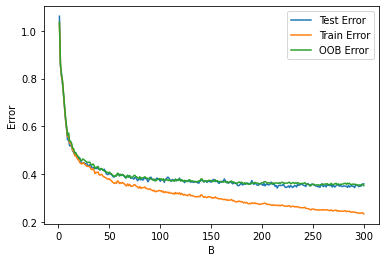

In [21]:
import seaborn as sns

plot = sns.lineplot(x=B, y=test_errors, label=str('Test Error'))
plot = sns.lineplot(x=B, y=train_errors, label=str('Train Error'))
plot = sns.lineplot(x=B, y=OOB_errors, label=str('OOB Error'))
plot.set(xlabel='B', ylabel='Error')

In [22]:
train_errors_ = []
OOB_errors_ = []
test_errors_ = []




for i in range(1,301):
    clf_random_ = RandomForestRegressor(random_state=20, oob_score=True, max_samples = i, max_features=122)
    clf_random_.fit(X_Train_Imputed, Y_Train)
    
    train_errors_.append(1-clf_random_.score(X_Train_Imputed, Y_Train))
    OOB_errors_.append(1-clf_random_.oob_score_)
    test_errors_.append(1-clf_random_.score(X_Test_Imputed, Y_Test))
    
    
print(train_errors_)
print(OOB_errors_)
print(test_errors_)

[1.0330389952954449, 0.8609427352793673, 0.8203126905882978, 0.7864099919651341, 0.7141161057729847, 0.6742262659791308, 0.6221069333213068, 0.5791509796380153, 0.5733178620171729, 0.5432049660338971, 0.5134506137908944, 0.5036607594587114, 0.488433100780156, 0.48686091943802134, 0.4880921240967806, 0.47894761399984753, 0.4579901975729386, 0.4549204675148846, 0.4443069636990288, 0.4418062854256528, 0.4323976958638376, 0.42275964384770814, 0.41609656144973617, 0.4193971473568713, 0.41861534923491894, 0.4063946387147397, 0.41135013643860985, 0.409030827413168, 0.40437175091054867, 0.394605972857239, 0.39951499277441016, 0.39145990627933447, 0.39067903230910606, 0.376973806799047, 0.3810798268880864, 0.3799997559243924, 0.3796772678433913, 0.3737397238024416, 0.37603727812333854, 0.3714237548018311, 0.363632117059706, 0.3605395607739249, 0.3648055438142782, 0.3576704921197167, 0.3595423681301526, 0.35996878554875433, 0.353897754597122, 0.35483802513366336, 0.3525639327279888, 0.3513580612

[Text(0.5, 0, 'B'), Text(0, 0.5, 'Error')]

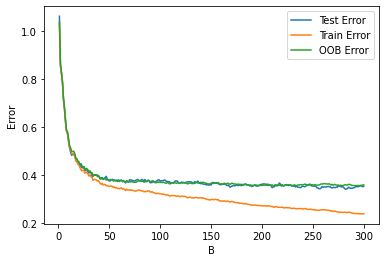

In [23]:
plot = sns.lineplot(x=B, y=test_errors_, label=str('Test Error'))
plot = sns.lineplot(x=B, y=train_errors_, label=str('Train Error'))
plot = sns.lineplot(x=B, y=OOB_errors_, label=str('OOB Error'))
plot.set(xlabel='B', ylabel='Error')

##### Variable importance plot from our random forest (10 most important features).

<AxesSubplot:>

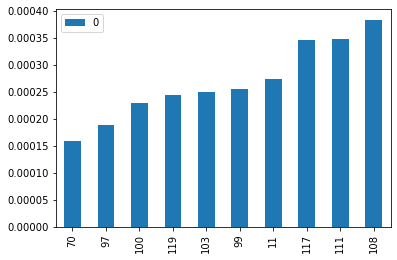

In [24]:
nums = []
for i in (0,122):
    nums.append(i)
importances = pd.DataFrame(clf_random_.feature_importances_)

# importances.plot(kind='bar')

newdf = importances.sort_values(by=[0])

top10 = newdf.head(10)

top10.plot(kind='bar')
    

